# Análise e Machine Learning - Titanic

<img src = "titanic.jpg"/>

#### Autor: Alexandre Kalebe Saback Silva

# Contextualização do Problema
O naufrágio do Titanic é um dos acontecimentos mais famosos da história, deixando um saldo trágico de mais de 1500 mortos. Nesse projeto será realizada uma análise exploratória sobre os dados do navio britânico para identificar os diversos fatores que determinaram a sobrevivência de alguns passageiros do RMS Titanic. Além disso, será construído um modelo de machine learning que irá prever quais passageiros sobreviveriam/sobreviveram ao naufrágio.

# Obtenção dos dados
Os dados utilizados nesse projeto estão [neste link](https://www.kaggle.com/c/titanic/overview).
No mesmo link também é possível consultar todo o dicionário de variáveis para facilitar o entendimento da análise.

# Começando
O primeiro passo da nossa análise é carregar as bibliotecas necessárias, e os dados a serem analisados.

Aqui, utilizaremos a biblioteca `Pandas`, que nos permite trabalhar com arquivos csv com mais facilidade, em um formato tabular, que lembra as tabelas do Excel.

`Matplotlib` e `Seaborn` são bibliotecas gráficas que utilizaremos para plotar visualizações.

`Numpy` é uma das bibliotecas mais utilizadas em Data Science, e nos dá suporte para trabalharmos com arrays multidimensionais, matrizes, etc.

`Scipy` é um ecosistema de softwares open-source baseado em Python para matemática, ciência e engenharia.

`Sklearn` é uma biblioteca de machine learning (aprendizado de máquina) open-source para Python. Essa biblioteca será importada mais tarde na construção do modelo de machine learning.

Sabendo disso, vamos botar a mão na massa!

In [2]:
# Importações
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Agora é hora de carregar os dados e iniciar a análise

In [3]:
# Carregando os dados
data = pd.read_csv('train.csv')

In [4]:
# Verificando o tamanho do dataset. Linhas x Colunas
data.shape

(891, 12)

In [5]:
# Dando uma olhada rápida nos dados
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Quantos sobreviveram?

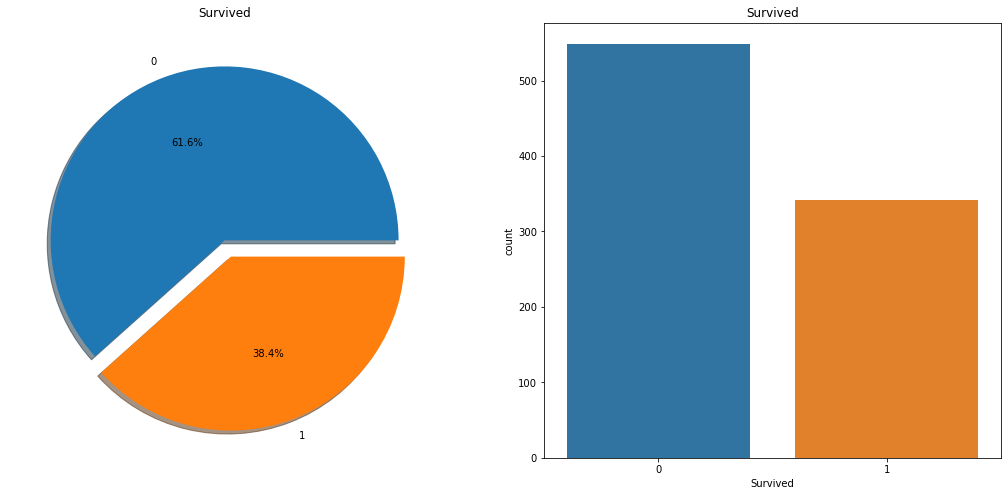

In [6]:
# Visualizando sobreviventes
fig, ax = plt.subplots(1,2, figsize = (18,8))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

Dos 891 passageiros registrados nesse _dataset_, aproximadamente apenas 350 sobreviveram. Ou seja, 38.4% do total de passageiros nesse _dataset_ sobreviveram.

Obs: 0 = Não sobreviveram; 1 = Sobreviveram

# Analisando as Variáveis

O objetivo desse projeto é prever se um passageiro sobreviveria ou não ao naufrágio do Titanic. Para isso, é necessário entender as correlações existentes entre as _features_ (variáveis) do conjunto de dados em questão. A variável independente (target), ou seja, a variável que desejamos fazer previsões, nesse caso é a _feature_ "Survived". Observando os valores (0,1) dessa variável é possível concluir que nesse projeto temos um problema de classificação binária, ou seja, o modelo de machine learning utilizará um algoritmo de classificação para realizar as previsões.

* `Variável numérica`: Os valores de uma variável quantitativa ou numérica são números que representam geralmente uma contagem ou uma medição.

* `Variável categórica`: Os valores de uma variável categórica são categorias ou grupos mutuamente exclusivos. Os dados categóricos podem ou não ter alguma ordem lógica.

* `Variável ordinal`: Uma variável ordinal é semelhante a valores categóricos, mas a diferença entre eles é que podemos ter uma ordem ou classificação relativa entre os valores. 

### Sex: Variável Categórica

In [7]:
# Agrupando as variáveis "Sex" e "Survived"
data.groupby(['Sex','Survived'])['Survived'].count().to_frame()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

0 = Não sobreviveram
1 = Sobreviveram

#### Transformando essas informações em gráficos para facilitar a visualização.

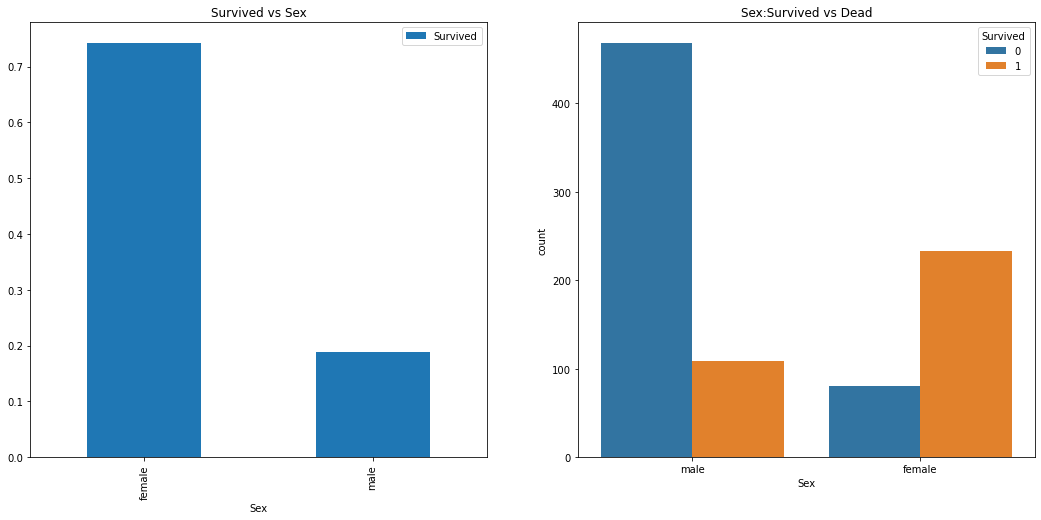

In [8]:
fig, ax = plt.subplots(1,2,figsize = (18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Atráves dessas análises, é possível chegar a algumas conclusões:
* O número de homens no navio é muito maior que o número de mulheres;
* O número de mulheres sobreviventes é quase o dobro do número de homens sobreviventes;
* A taxa de sobrevivência de mulheres no navio é de aproximadamente 75%, enquanto dos homens é de de aproximadamente 18-19%.

### Pclass: Variável Ordinal

In [9]:
# Agrupando as variáveis "Pclass" e "Survived"
pd.crosstab(data['Pclass'], data['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#### Transformando essas informações em gráficos para facilitar a visualização.

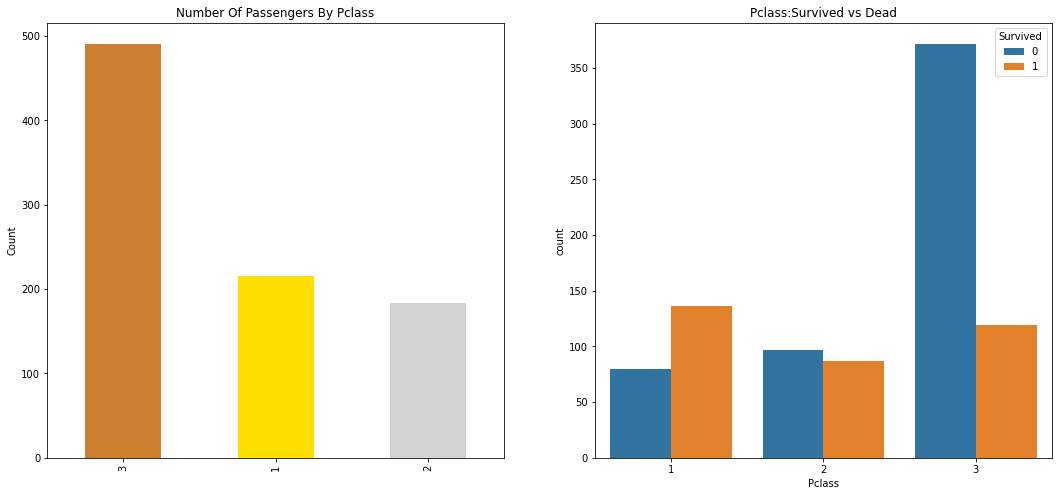

In [10]:
fig,ax = plt.subplots(1,2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Algumas conclusões sobre as análises:
* Os passageiros de primeira classe (Pclass1) claramente receberam uma maior atenção no momento do naufrágio.
* Apesar do alto número de passageiros de terceira classe (Pclass3), o número de sobreviventes nessa classe foi muito baixo, próximo de 25%.
* A taxa de sobrevivência na primeira classe (Pclass1) é próxima de 63%, enquanto na segunda classe (Pclass2) é de aproximadamente 43%.

Querendo ou não, o dinheiro importa, e muito.

Agora vamos aprofundar mais um pouco. Vamos verificar a taxa de sobrevivência com as features "Sex" e "Pclass" juntas.

In [11]:
pd.crosstab([data.Sex,data.Survived], data['Pclass'], margins = True).style.background_gradient(cmap='summer_r')

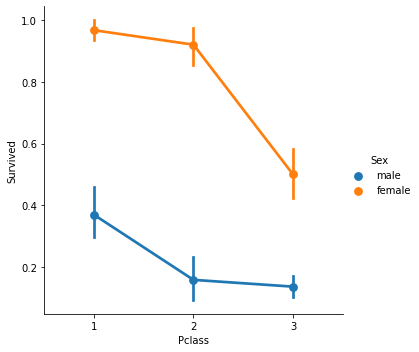

In [12]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

O gráfico acima é um _FactorPlot_. Esse tipo de gráfico torna mais facil visualizar valores separados por categorias. 

Analisando esses plots, chegamos a algumas conclusões:
* Cerca de 95% das mulheres na primeira classe sobreviveram;
* No momento do resgate as mulheres tiveram maior prioridade.

Conclusão final: É evidente que a feature "Pclass" tem um grau considerável de importância nesse dataset.

Contudo, devemos continuar analisando mais features.

### Age: Variável Contínua

In [13]:
# Verificando as idades dos passageiros
print('O passageiro mais velho tinha:', data['Age'].max(), 'Anos')
print('O passageiro mais novo tinha:', data['Age'].min(), 'Anos')
print('Idade média dos passageiros no navio::', data['Age'].mean(), 'Anos')

O passageiro mais velho tinha: 80.0 Anos
O passageiro mais novo tinha: 0.42 Anos
Idade média dos passageiros no navio:: 29.69911764705882 Anos


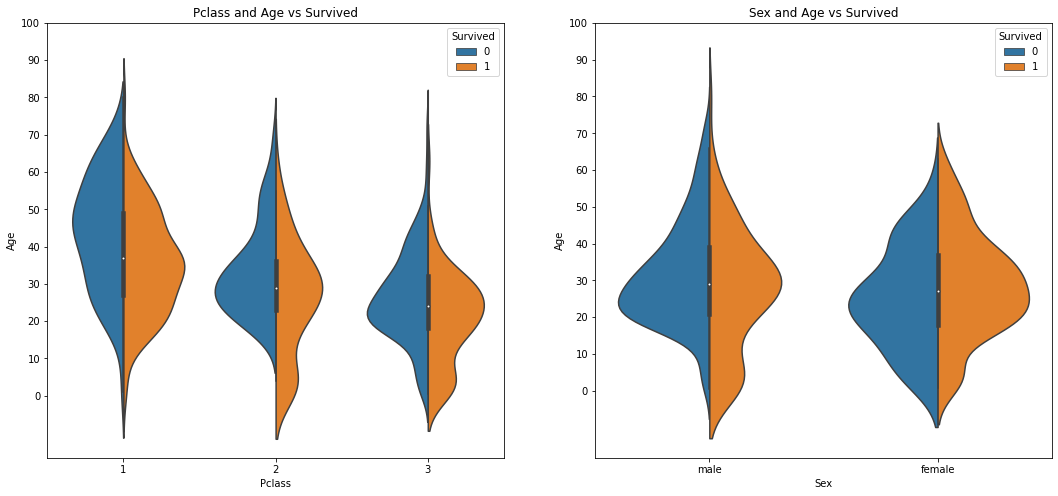

In [14]:
fig,ax = plt.subplots(1,2, figsize = (18,8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

O plot acima é um _ViolinPlot_. Esse tipo de plot compara a distribuição de uma variável entre diferentes categorias, nesse caso as varíaveis Pclass, Age, Sex e Survived, e suas respectivas categorias.

Conclusões sobre a análise:
* O número de crianças aumenta de acordo com a classe. Pclass3 > Pclass2 > Pclass1;
* A taxa de sobrevivência para passageiros com menos de 10 anos de idade parece boa independente da Pclass.
* As chances de sobrevivência de passageiros entre 20 e 50 anos na primeira classe são bem altas, ainda mais para as mulheres.
* As chances de sobrevivência para os homens diminui conforme a idade aumenta.

# Missing data (dados faltantes ou ausentes)

Perguntas importantes sobre dados ausentes:

* Qual é a predominância dos dados ausentes?
* Os dados ausentes são aleatórios ou têm um padrão?
A resposta a essas perguntas é importante por razões práticas, porque dados ausentes podem implicar na redução do tamanho da amostra. Isso pode nos impedir de prosseguir com a análise. Além disso, de uma perspectiva substantiva, precisamos garantir que o processo de dados ausentes não seja tendencioso e oculte uma verdade inconveniente. 

In [15]:
# Missing data
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


Com essa simples análise é possível afirmar que 77% das observações da feature "Cabin" não possuem informação. Sendo assim, posteriormente tal variável será retirada do dataset.

A variável "Age" também possui alguns dados faltantes. É possível substituir tais valores pela idade média dos passageiros nesse dataset. Mas o problema é que há muitas pessoas com idades diferentes. Sendo assim, não podemos simplesmente atribuir à uma criança de 4 anos a idade média de 29 anos. Então, como faremos isso?  Olhando o nome dos passageiros! Muitos deles possuem títulos como, Mr ou Mrs. Dessa forma, podemos associar os valores médios de idade a cada grupo.

A variável "Embarked" apresenta alguns poucos dados faltantes, porém, não há necessidade de substituir esses poucos valores no momento.

### Extraindo os títulos da variável "Name"

In [16]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.') # Extraindo os títulos dos nomes

In [17]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='summer_r') # Visualizando os títulos de acordo com o sexo

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Existem alguns títulos escritos de forma errada como por exemplo, "Mlle" ou "Ms" que fazem referência ao título "Miss". Sendo assim, iremos renomear esses valores errôneos por seus valores correspondentes.

In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don']
                        ,['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [19]:
data.groupby('Initial')['Age'].mean() # Verificando a iade média de acordo com os títulos

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Substituindo os valores missing na variável "Age"

In [20]:
# Substituindo os valores missing pelo valor médio da idade correspondente a cada grupo.
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mr'), 'Age'] =33
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mrs'), 'Age'] =36
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Master'), 'Age'] =5
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Miss'), 'Age'] =22
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Other'), 'Age'] =46

In [21]:
# Verificando se existe algum valor missing na varíavel "Age"
data['Age'].isnull().any()

False

# Voltando as análises

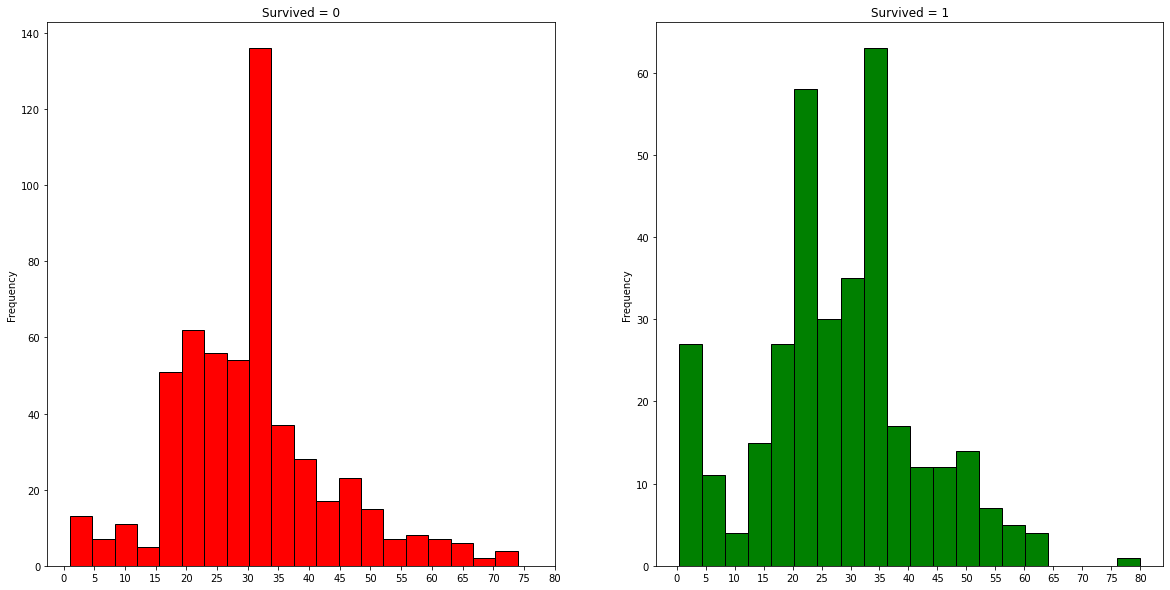

In [22]:
fig,ax = plt.subplots(1,2, figsize = (20,10))
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'green')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Algumas conclusões:
* As crianças (age<5) foram salvas em grande número (Mulheres e crianças primeiro);
* O passageiro mais velho foi salvo (80 anos);
* O número máximo de mortes ocorreu entra a faixa etária de 30 a 40 anos.

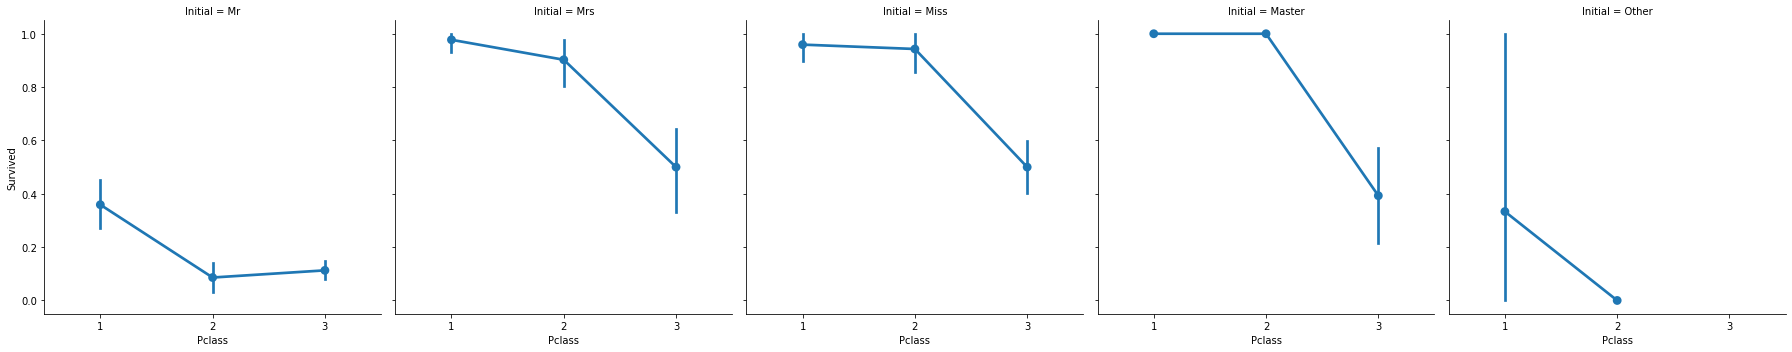

In [23]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = data)
plt.show()

A política de salvar mulheres e crianças primeiro ocorre independentemente da Pclass

### Embarked: Variável Categórica

In [24]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap='summer_r')

#### Chances de sobrevivência de acordo com o porto de embarque

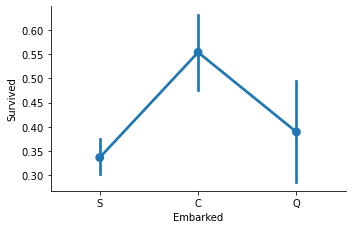

In [25]:
sns.factorplot('Embarked', 'Survived', data = data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

As chances de sobrevivência para quem embarcou no porto C são maiores, em torno de 0.55, e são menores para aqueles que embarcaram no porto S. 

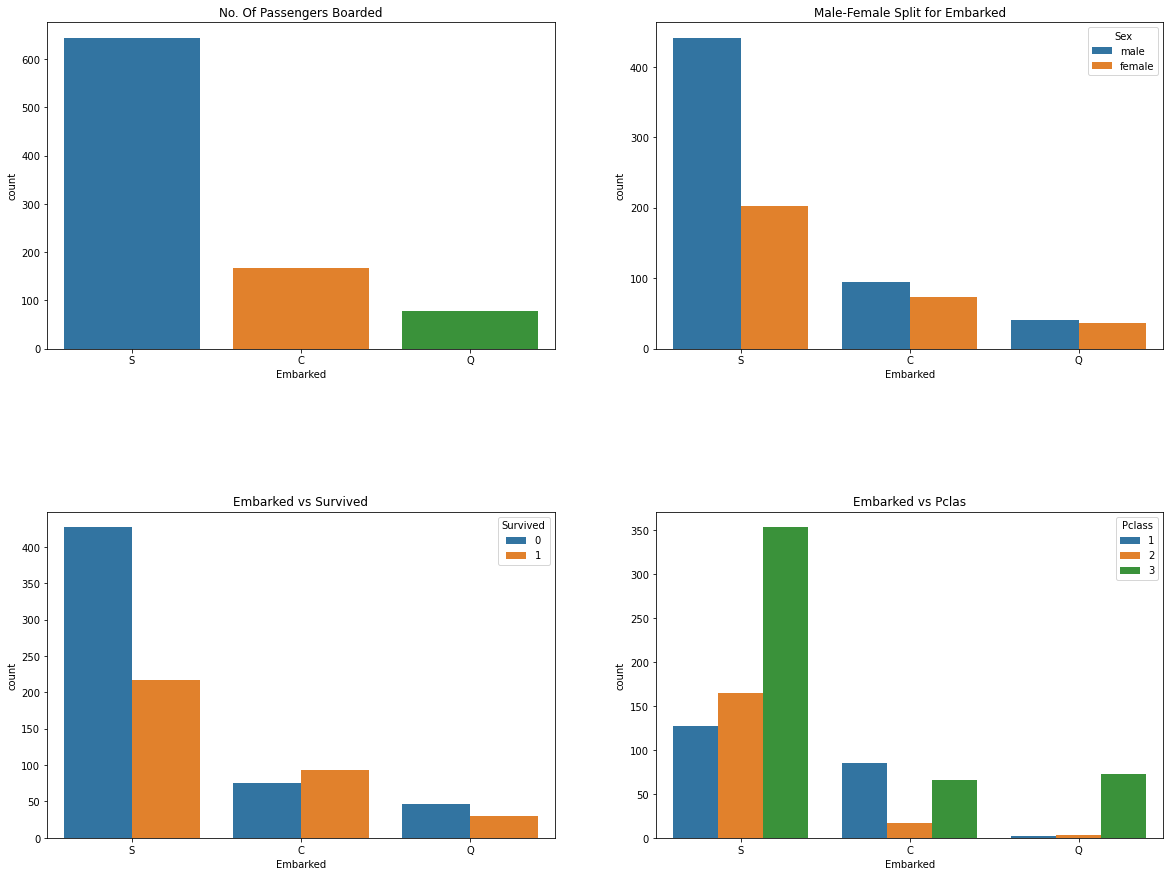

In [26]:
fig,ax = plt.subplots(2,2, figsize = (20,15))
sns.countplot('Embarked', data = data, ax = ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = data, ax = ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = data, ax = ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = data, ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclas')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

Conclusões:
* A maioria dos passageiros embarcaram no porto S. A maioria deles sendo da Pclass3;
* A maioria dos passageiros que embarcaram no port C sobreviveram;
* Os passageiros mais ricos embarcaram no porto S. Contudo, a taxa de sobrevivência ainda é baixa;
* A grande maioria dos passageiros que embarcaram no porto Q são da Pclass3.

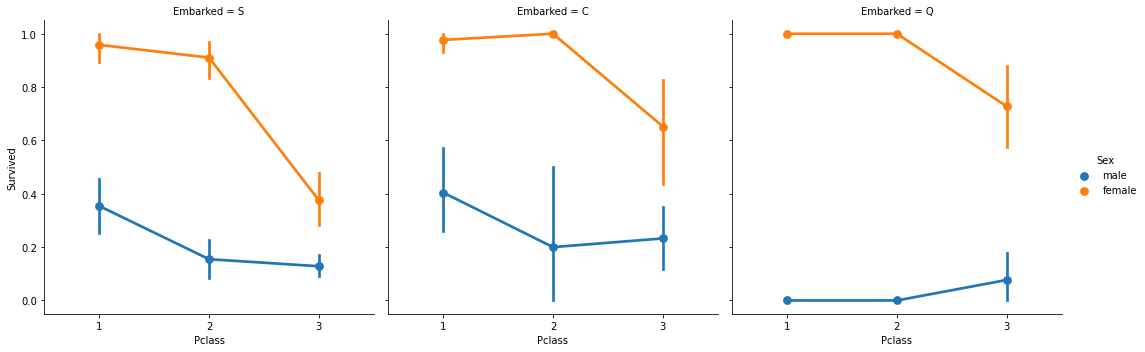

In [27]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

Algumas conclusões:
* A chance de sobreviência para as mulheres na primeira e na segunda classe (Pclass) é quase 1 (100%);
* A taxa de sobreviência dos passageiros na terceira classe que embarcaram no porto S é muito baixa;
* Quase todos os homens que embarcaram no porto Q morreram.

### Substituindo os valores missing na variável "Embarked"

Dessa vez iremos utilizar a moda para substituir os valores missing. Sendo assim, substituiremos todos os valores ausentes pelo valor "S" que é o porto onde se encontram mais passageiros.

In [28]:
data['Embarked'].fillna('S', inplace = True)

In [29]:
# Verificando se ainda existem valores ausentes
data['Embarked'].isnull().any()

False

### SibSip: Variável Númerica

Essa feature indica se uma pessoa está sozinha ou se está com algum familiar.
* Sibling = brother, sister, stepbrother, stepsister;
* Spouse = husband, wife.

In [30]:
pd.crosstab([data.SibSp], data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


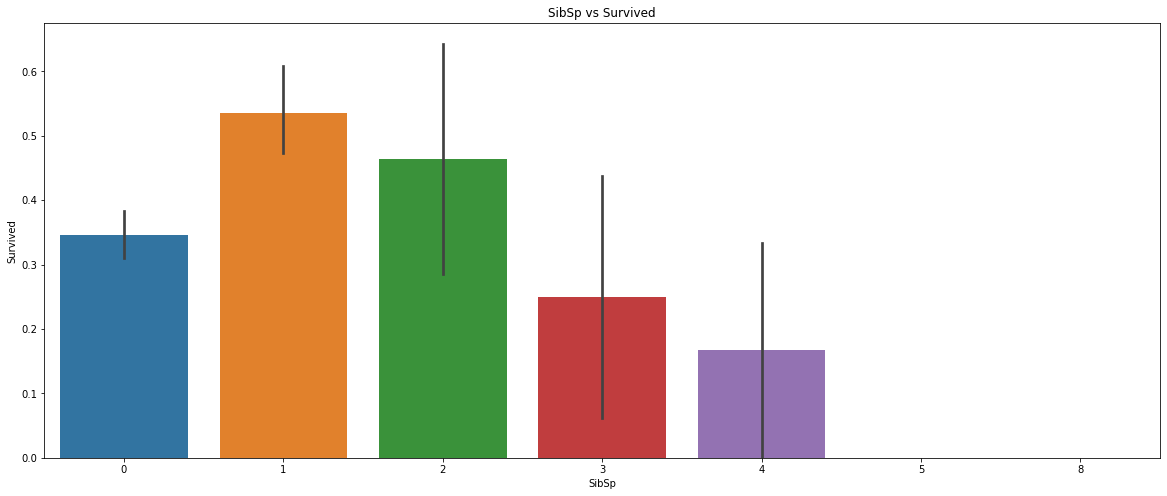

In [31]:
fig, ax = plt.subplots(figsize = (20,8))
sns.barplot('SibSp','Survived',data=data)
ax.set_title('SibSp vs Survived')
plt.show()

In [32]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Conclusões:
* Passageiros que estão sozinhos possuem 34.5% de chance de sobrevivência;
* A partir de três familiares, quanto maior o número de familiares, menor a probabilidade de sobrevivência;
* Famílias com 5-8 membros possuem 0% de chance de sobreviver.

### Correlações entre as variáveis

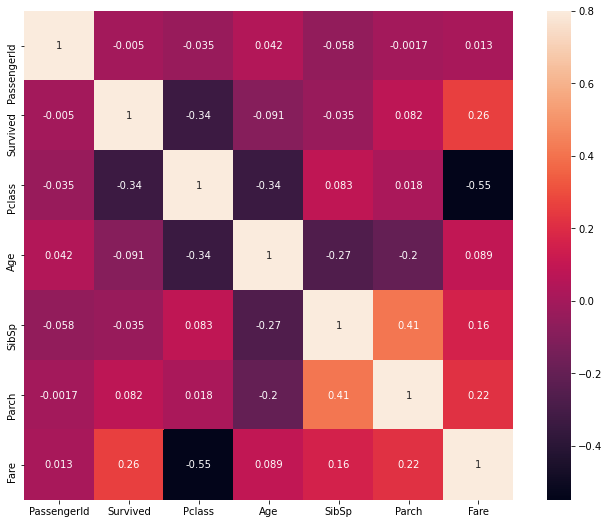

In [34]:
# Matriz de correlação
corrmat = data.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True)

Essa matriz pode ser bem confusa para alguns, então vamos por parte.
* O principal objetivo da Matriz de Correlação é verificar, como o nome sugere, as correlações existentes entre as diversas variáveis existentes no dataset. Com isso em mente, é possível verificar o grau de correlação entre as variáveis observando a intensidade das cores na matriz, ou seja, se a cor for clara, isso indica uma correlação positiva e, se a cor for escura, indica uma correlação negativa.

* Observando a matriz é possível concluir que as variáveis presentes nesse dataset não estão muito correlacionadas entre si, visto que, a maior correlação existente se manifesta entre as variáveis "SibSp" e "Parch". Por outro lado, a menor correlação existente se encontra entre as variavéis "Pclass" e "Fare". Sendo assim, não iremos descartar nenhuma variável no momento, e utilizaremos todas elas para treinar o modelo de machine learning.

# Feature Engineering e Data Cleaning

Através da Feature Engineering (Engenharia de Recursos) é possível extrair o potencial máximo dos dados para modelos preditivos. Dessa forma, Feature Engineering e Data Cleaning são partes importantíssimas na análise dos dados.

### "Age_band"

Variáveis contínuas são problemáticas para modelos de machine learning.

Ex: Se quisermos agrupar as pessoas por gênero, isso é facilmente resolvido agrupando-as em Masculino e Feminino. Porém, se quisermos agrupar as pessoas por idade, como faremos isso? Se forem 30 pessoas, existiram 30 valores de idade, dificultando a realização de tal operação. 

Dessa forma, é necessário converter as variáveis contínuas para variáveis categóricas através de técnicas como _normalization_ ou _binning_. Nesse caso, utilizaremos a técnica de  _binning_ para converter a variável "Age".

In [35]:
# Como o passageiro mais velho possui 80 anos, iremos dividir as idades em 5 grupos (0-4). Para isso, realizaremos a seguinte operação: 80/16 = 5
data['Age_band'] = 0
data.loc[data['Age'] <=16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <=32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <=48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <=64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [36]:
# Visualizando o número de passageiros em cada grupo
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


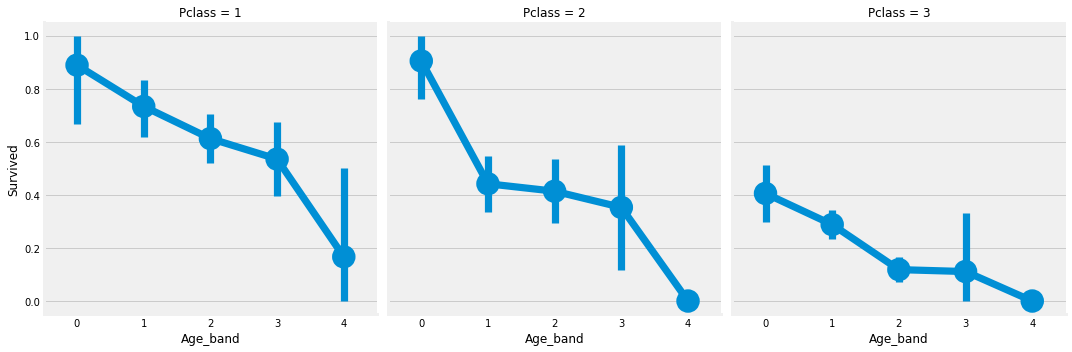

In [38]:
sns.factorplot('Age_band','Survived',data = data ,col = 'Pclass')
plt.show()

A chance de sobrevivência diminui conforme a idade aumenta, indiferente da Pclass.

### "Family_Size" e "Alone"

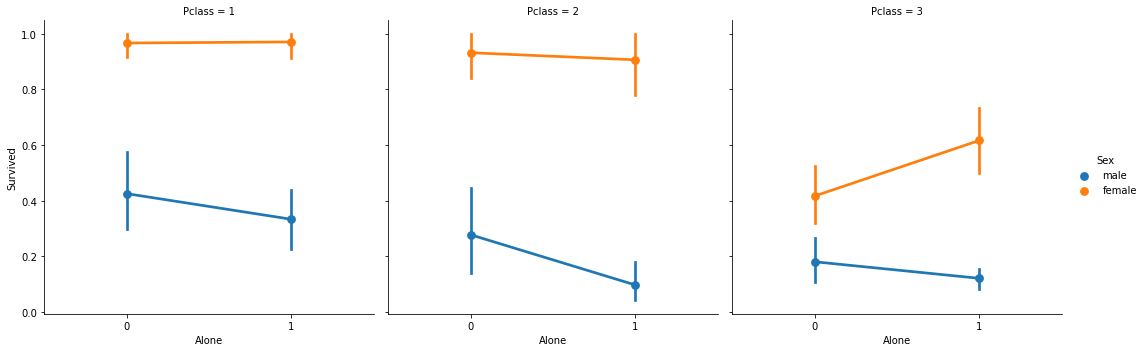

In [39]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] # Family size
data['Alone'] = 0
data.loc[data['Family_Size'] == 0, 'Alone'] = 1 # Alone

sns.factorplot('Alone','Survived', hue = 'Sex', col = 'Pclass', data = data)
plt.show()

É visível que estar sozinho é prejudicial independentemente do gênero ou da classe, exceto para a classe 3, onde as chances de mulheres sozinhas são maiores do que aquelas com família. 

### "Fare_Range"

Como "Fare" é uma variável contínua, é necessário converte-la para valores ordinais. Para isso, utilizaremos a função "qcut" do Pandas.

A função "qcut" divide os valores em grupos de acordo com o número de _bins_ especificado. Por exemplo, se o número de _bins_ for 4, então os valores daquela variável serão divididos igualmente em 4 grupos ou intervalos de valores.

In [40]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Podemos ver claramente que, à medida que a "Fare" aumenta, as chances de sobrevivência aumentam. 

Agora, devemos converter os valores da mesma forma que fizemos com a variável "Age"

In [41]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] >7.91) & (data['Fare'] <=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] >14.454) & (data['Fare'] <=31), 'Fare_cat'] = 2
data.loc[(data['Fare'] >31) & (data['Fare'] <=512.329), 'Fare_cat'] = 3

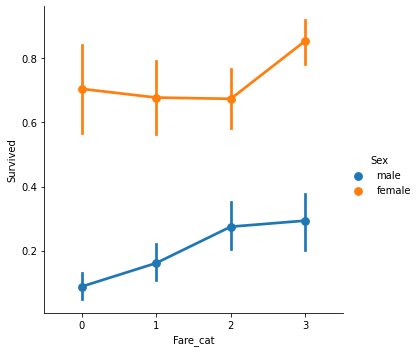

In [42]:
sns.factorplot('Fare_cat', 'Survived', hue = 'Sex', data = data)
plt.show()

Claramente, à medida que o "Fare_cat" aumenta, as chances de sobrevivência aumentam. Esta variável pode se tornar um recurso importante durante a modelagem junto com a variável "Sex". 

### Convertendo valores de String em valores Númericos

Como não podemos passar _strings_ para os modelos de machine learning, é necessário converter algumas classes como "Sex", "Embarked", e "Initial" em valores númericos.

In [43]:
data['Sex'].replace(['male', 'female'],[0,1], inplace = True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace = True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace = True)

### Descartando variáveis desnecessárias

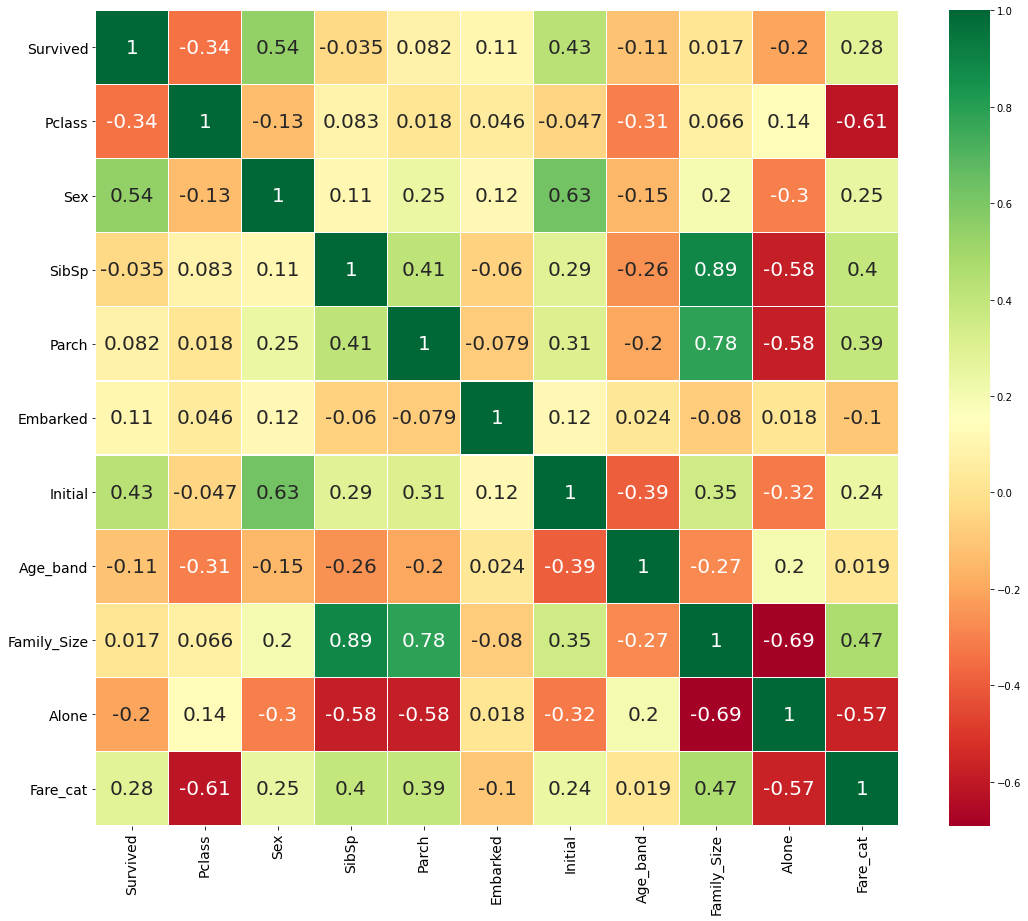

In [44]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Com essa nova matriz de correlação é possível observar novas correlações positivas como, "SibSip" e "Family_Size", "Parch e "Family_Size". Também é possível visualizar correlações negativas como, "Alone" e "Family_Size".

# Conclusão da Análise Exploratória dos Dados
Agora que chegamos ao fim da análise, podemos finalmente seguir para a parte mais curta do projeto, Machine Learning.
Ainda seria possível realizar mais alterações nos dados a fim de deixa-los mais propícios ao modelo de aprendizado de máquina. Contudo, nesse projeto não realizaremos tais modificações.

# Machine Learning
<img src = "machine_learning_746x419.jpg"/>

#### Escolha do modelo
Nesse projeto, utilizaremos o algoritmo de classificação SVM (Suport Vector Machine).

O algoritmo SVM oferece uma escolha de funções de kernel para realizar seu processamento. Basicamente, o mapeamento de dados em um espaço dimensional superior é chamado de kernelling. A função matemática usada para a transformação é conhecida como função kernel e pode ser de diferentes tipos, como:

```
1. Linear
2. Polinomial
3. Função de base radial (RBF)
4. Sigmóide
```

Cada uma dessas funções tem suas características, seus prós e contras e sua equação, mas como não há uma maneira fácil de saber qual função tem o melhor desempenho com qualquer conjunto de dados, geralmente escolhemos funções diferentes e comparamos os resultados. Vamos apenas usar o padrão, RBF (Função de base radial) para este projeto. 

In [45]:
# Importações
from sklearn import svm # Support Vector Machine
from sklearn.model_selection import train_test_split # Separação dos dados em treino/teste
from sklearn import metrics # Medidas de precisão
from sklearn.metrics import confusion_matrix # Matriz de Confusão

#### Separando os dados em Treino/Teste
A divisão dos dados em Treino/Teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, treinaremos o modelo com o conjunto de treino e testaremos com o conjunto de teste. Isso fornecerá uma avaliação mais precisa sobre a precisão fora da amostra, porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar os dados. É mais realista para problemas do mundo real.

Vamos dividir os dados em Treino/Teste, sendo 80% dos dados para treino e 20% para teste.

In [47]:
train,test = train_test_split(data, test_size = 0.2, random_state = 0, stratify = data['Survived'])

train_X = train[train.columns[1:]] # Retirando a variável target (Survived) dos dados de treino
train_Y = train[train.columns[:1]] # Isolando a variável target (Survived)

test_X = test[test.columns[1:]] # Retirando a variável target (Survived) dos dados de treino
test_Y = test[test.columns[:1]] # Isolando a variável target (Survived)


#### Radial Support Vector Machine (rbf-SVM)

In [48]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1) # Instanciando o modelo
model.fit(train_X, train_Y) # Treinando o modelo com os dados de treino
prediction1 = model.predict(test_X) # Relizando previsões nos dados de teste

In [49]:
# Verificando a acurácia do modelo em prever corretamente os dados
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.8100558659217877


Conseguimos alcançar uma precisão de 81% em prever corretamente novos dados. Não é uma precisão ótima, porém, levando em consideração que não realizamos certas modificações nos dados como Cross Validation, Hyper-Parameters Tuning, dentre outras técnias, podemos dizer que é uma precisão aceitável.

#### Exportando as previsões

In [57]:
prediction1 = pd.DataFrame(columns = ['Survived'], data = prediction1)
prediction1.index.name = 'Id'
prediction1.to_csv('Sample_Submission.csv')

# Previsões realizadas pelo modelo

In [59]:
prediction1_df = pd.read_csv('Sample_Submission.csv')
prediction1_df.head(10)

,Id,Survived
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
5,5,0
6,6,0
7,7,0
8,8,1
9,9,0


* Survived(0) = Não sobreviveu/sobreviveria
* Survived(1) = Sobreviveu/sobreviveria

# Matriz de Confusão

Uma Matriz de Confusão fornece o número de classificações corretas e incorretas feitas pelo algoritmo de classificação. 

In [52]:
X=data[data.columns[1:]]
Y=data['Survived']

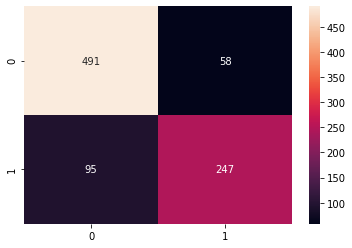

In [54]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')
plt.show()

A diagonal da esquerda para a direita de cima para baixo (491 - 247) representa os acertos do modelo, enquanto a diagonal da direita para a esquerda de cima para baixo (58 - 95) representa os erros cometidos pelo modelo de machine learning.

# Conclusão

Chegamos ao fim de mais um projeto de Data Science. Eu poderia ter realizado diversas outras abordagens na análise exploratória de dados, assim como utilizar diversos outros modelos de machine learning, como, KNN, Decision Tree, Logistic Regression, para realizar previsões através dos dados, e principalmente, poderia ter utilizado técnicas para aprimorar a acurácia do modelo de machine learning. Contudo, creio que para esse projeto, as análises realizadas são suficientes. Continuarei estudando e pretendo me aprofundar cada vez mais nesse universo sensacional que é Data Science. 

# Referências
* [Machine Learning with Python: A Practical Introduction](https://courses.edx.org/courses/course-v1:IBM+ML0101EN+3T2020/course/)
* [EDA To Prediction](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)
* [House Prices EDA](https://github.com/AlexandreSaback/Data-Science/blob/main/Projetos/House%20Prices%20EDA/House%20Prices%20EDA.ipynb)